In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from adjustText import adjust_text
import matplotlib.patheffects as pe
import pandas as pd
import os
os.chdir(r'F:\gdT_aim2\Geneformer')

In [2]:
#113 got from biomart
txid = pd.read_csv('mart_export.txt',sep = '\t')
del txid['Transcript stable ID']
txid = txid.drop_duplicates()

# txid.index = txid['Gene stable ID']
# txid['Gene name and ID'] = txid['Gene name'].astype(str).map(str) +'_'+ txid.index.astype(str).map(str)
# txid['Gene name and ID'][txid['Gene name'].isna()] = txid.index.astype(str)[txid['Gene name'].isna()]
# txid['Name'] = txid['Gene name']
# txid['Name'][pd.DataFrame(txid['Gene name']).duplicated()] = txid['Gene name and ID'][pd.DataFrame(txid['Gene name']).duplicated()]
txid.index = txid['Gene stable ID']
id_table = pd.DataFrame(txid['Gene name']).T
id_dict = id_table.to_dict(orient = 'records')[0]#index = False)
# # ylimmax = [80,60,100,100,130]

In [ ]:
df = pd.read_csv(f"TRM2Teff.csv",index_col= 3)
# df = pd.read_csv(r"non_cluster_geneformer_result\activation.csv",index_col= 3)

In [6]:
data = df.rename(index = id_dict)
data = data[data['Shift_to_goal_end'] > 0 ]
data = data[data['N_Detections']>50]
# Calculate -log10(FDR)
data['-log10_FDR'] = -np.log10(data['Goal_end_FDR'])

c:\Users\16220\anaconda3\envs\cpdb\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
del data['Unnamed: 0']
data.index.name = 'Gene Symbol'

In [ ]:
data[['Shift_to_goal_end','Goal_end_FDR','N_Detections']].to_csv('Geneformer_TRM2Teff_organized_output.csv')
# data[['Shift_to_goal_end','Goal_end_FDR','N_Detections']].to_csv('Geneformer_low2high_organized_output.csv')

In [ ]:
degs = pd.read_csv(r"F:\gdT_aim2\NicheNet\TRM2Teff_deg.csv", index_col= 0)
degs_list=degs[(degs['pval_adj']<0.05) & (degs['log2fold']>1)].index.tolist()

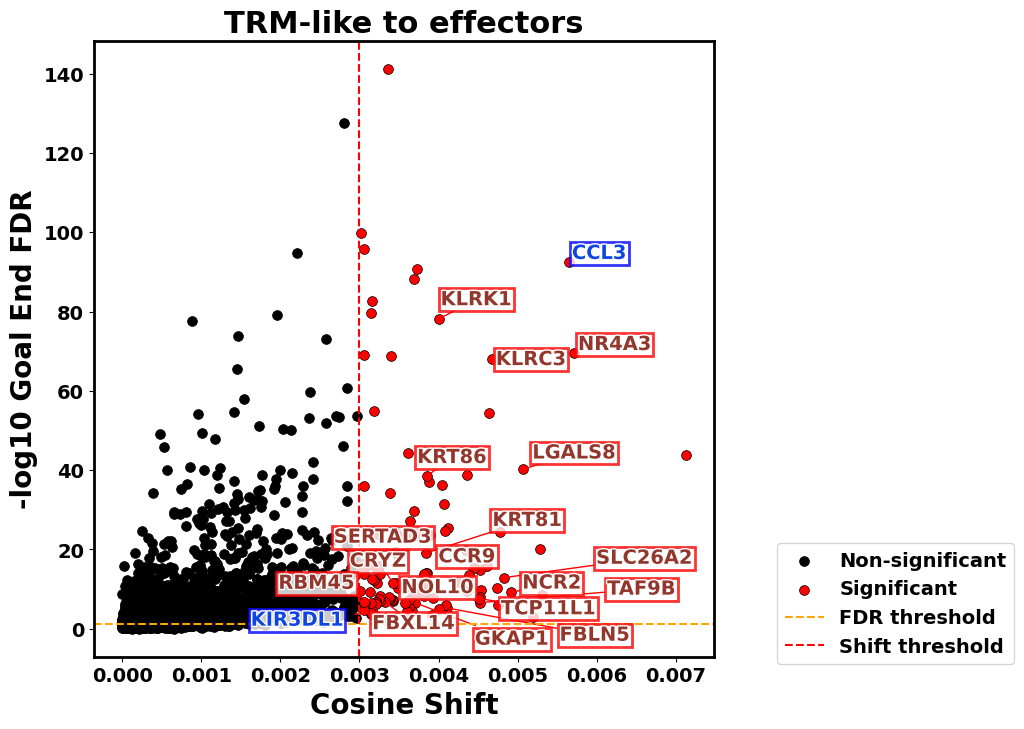

In [62]:
fdrs = ['-log10_FDR']
for j, colname in enumerate(['Shift_to_goal_end']):
        sig_data = data[(data['Sig'] == 1) & (data[colname] >= 0.003)]
        non_sig_data = data[(data['Sig'] == 0) | (data[colname] < 0.003)]

        important_list = sig_data.index[((sig_data[fdrs[j]] > 100) | (sig_data[colname] > 0.003)) & ~sig_data.index.str.startswith('RP') & ~sig_data.index.str.startswith('MT')& ~sig_data.index.str.startswith('ENSG')]

        # Plot settings
        plt.figure(figsize=(8, 8))
        plt.rcParams.update({'font.size': 14, 'font.weight': 'bold', 'axes.linewidth': 2})

        # Scatter plot for significant and non-significant points
        plt.scatter(non_sig_data[colname], non_sig_data[fdrs[j]], 
                    color='black', s=50, edgecolors='black', linewidths=0.5, label='Non-significant')

        plt.scatter(sig_data[colname], sig_data[fdrs[j]], 
                    color='red', s=50, edgecolors='black', linewidths=0.5, label='Significant')
        texts = []
        for i, row in sig_data.iterrows():
                if i in important_list:
                    if i in degs_list:
                        texts.append(plt.text(row[colname], row[fdrs[j]], 
                                            i, size = 14, color= '#0E46E2', weight = 'bold', bbox=dict(boxstyle="Square,pad=0.1", fc="white", ec="b", lw=2, alpha = 0.8),
                                            path_effects=[pe.withStroke(linewidth=2, foreground="white")]))  
                    else:
                        if np.random.random(1)>0.9 or i in ['CCR9','NCR2','LGALS8','KLRK1','KLRC3','NR4A3','MMP9']:
                            texts.append(plt.text(row[colname], row[fdrs[j]], 
                                                    i, size = 14, color= '#93372C', weight = 'bold', bbox=dict(boxstyle="Square,pad=0.1", fc="white", ec="r", lw=2, alpha = 0.8),
                                                    path_effects=[pe.withStroke(linewidth=2, foreground="white")]))              

        # plt.ylim([-0.01,ylimmax[j]])
        plt.axhline(y=-np.log10(0.05), color="orange", linestyle="--", label='FDR threshold')
        plt.axvline(x=0.003, color="red", linestyle="--", label='Shift threshold')
        plt.legend(bbox_to_anchor=(1.5, 0.2))

        # Adjust text to avoid overlap
        adjust_text(texts, force_static  = 0.3, force_text = 0.4, max_move  = 100, arrowprops=dict(arrowstyle='-', color='red')) #force_static  = 0.4,

        #plt.xlim([-4.5,4.5])
        # Axes labels and title
        plt.xlabel("Cosine Shift", fontsize=20, fontweight='bold')
        plt.ylabel("-log10 Goal End FDR", fontsize=20, fontweight='bold')
        plt.title('TRM-like to effectors', fontsize=22 , fontweight='bold')
        # plt.show()
        plt.savefig('trm_to_effectors.png',bbox_inches='tight')